# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Method-section:" data-toc-modified-id="Method-section:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Method section:</a></div><div class="lev2 toc-item"><a href="#Clock-controlled--expression-simulation-based-on-peak-phase" data-toc-modified-id="Clock-controlled--expression-simulation-based-on-peak-phase-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Clock-controlled  expression simulation based on peak phase</a></div><div class="lev2 toc-item"><a href="#Metabolic-overview-posters" data-toc-modified-id="Metabolic-overview-posters-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Metabolic overview posters</a></div><div class="lev3 toc-item"><a href="#Clock-controlled-mRNA-peak-phase" data-toc-modified-id="Clock-controlled-mRNA-peak-phase-121"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Clock-controlled mRNA peak phase</a></div><div class="lev3 toc-item"><a href="#Clock-controlled-protein-peak-phase" data-toc-modified-id="Clock-controlled-protein-peak-phase-122"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Clock-controlled protein peak phase</a></div><div class="lev3 toc-item"><a href="#Number-of-hours-the-protein-peak-lags-behind-the-mRNA-peak" data-toc-modified-id="Number-of-hours-the-protein-peak-lags-behind-the-mRNA-peak-123"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Number of hours the protein peak lags behind the mRNA peak</a></div><div class="lev2 toc-item"><a href="#Metabolic-overview-animation" data-toc-modified-id="Metabolic-overview-animation-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Metabolic overview animation</a></div><div class="lev3 toc-item"><a href="#Clock-controlled-mRNA-expression-simulation" data-toc-modified-id="Clock-controlled-mRNA-expression-simulation-131"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Clock-controlled mRNA expression simulation</a></div><div class="lev3 toc-item"><a href="#Clock-controlled-protein-expression-simulation" data-toc-modified-id="Clock-controlled-protein-expression-simulation-132"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Clock-controlled protein expression simulation</a></div><div class="lev3 toc-item"><a href="#Glycolysis-TCA-Animation-including-reactions" data-toc-modified-id="Glycolysis-TCA-Animation-including-reactions-133"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>Glycolysis TCA Animation including reactions</a></div><div class="lev2 toc-item"><a href="#Omics-dashboard" data-toc-modified-id="Omics-dashboard-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Omics dashboard</a></div><div class="lev3 toc-item"><a href="#Generating-the-Omics-Dashboard-charts-in-python-ggplot" data-toc-modified-id="Generating-the-Omics-Dashboard-charts-in-python-ggplot-141"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Generating the Omics Dashboard charts in python ggplot</a></div><div class="lev4 toc-item"><a href="#GGplot-using-geom_ribbon" data-toc-modified-id="GGplot-using-geom_ribbon-1411"><span class="toc-item-num">1.4.1.1&nbsp;&nbsp;</span>GGplot using geom_ribbon</a></div><div class="lev2 toc-item"><a href="#SmartTables" data-toc-modified-id="SmartTables-15"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>SmartTables</a></div>

# Method section: 

## Clock-controlled  expression simulation based on peak phase

* The actual period of Neurospora is approximately every 22.5 ([solar time](http://www.circadian.org/dictionary.html#N158)) hours.
* The actual measurements of pheak phases  were performed at DD0 (onset of darkness) and then every 2 solar time hours for 22 hours.
* A [circadian hour](http://www.circadian.org/dictionary.html#N25) is $\frac{1}{24}{th}$ of the period of the organism, so   $2$ solar hours equals $2\cdot\frac{24}{22.5}=\frac{32}{15} = 2.1\bar{3}$ circadian hours.
* The onset of activity of nocturnal organisms defines the  twelfth hour in [circadian time](http://www.circadian.org/dictionary.html#N26), so DD0 corresponds to [CT12](http://www.circadian.org/dictionary.html#N41).

* Therefore, to convert the peak phase ($PP$) in solar time  to the [acrophase](http://www.circadian.org/dictionary.html#N3) ($\theta$) in circadian time, we use the following formula: $$\theta \equiv \left(PP\cdot\frac{24}{22.5} + 12\right)\mod 24 $$
* To compute the [cosinor](http://www.circadian.org/dictionary.html#N36) that simulates expression of each clock-controlled mRNA and protein over circadian time starting at [CT12](http://www.circadian.org/dictionary.html#N41), using arbitrary amplitude units that vary between 0 and 2, with 2 being the acrophase ($\theta$), we use the following function:

$$f(\theta; t, T, A, D) = A\cos\left(\frac{2\pi(t-\theta)}{T}\right)+D$$
 
Where the period $T=24$ [circadian hours](http://www.circadian.org/dictionary.html#N25), the amplitude $A$ and the offset $D$ both equal $1$. Time $t$ is simulated every $2.1\bar{3}$ [circadian hours](http://www.circadian.org/dictionary.html#N25) from $CT12$ to $CT11.5$ 

In [143]:
from fractions import Fraction
2*Fraction(24)/Fraction(22.5)

Fraction(32, 15)

In [189]:
%matplotlib notebook
import pandas as pd
import os, numpy as np
from math import pi, floor
from numpy import cos
import matplotlib.pyplot as plt

def explode(df, lst_cols, fill_value=''):
    # make sure `lst_cols` is a list
    if lst_cols and not isinstance(lst_cols, list):
        lst_cols = [lst_cols]
    # all columns except `lst_cols`
    idx_cols = df.columns.difference(lst_cols)

    # calculate lengths of lists
    lens = df[lst_cols[0]].str.len()

    if (lens > 0).all():
        # ALL lists in cells aren't empty
        return pd.DataFrame({
            col:np.repeat(df[col].values, df[lst_cols[0]].str.len())
            for col in idx_cols
        }).assign(**{col:np.concatenate(df[col].values) for col in lst_cols}) \
          .loc[:, df.columns]
    else:
        # at least one list in cells is empty
        return pd.DataFrame({
            col:np.repeat(df[col].values, df[lst_cols[0]].str.len())
            for col in idx_cols
        }).assign(**{col:np.concatenate(df[col].values) for col in lst_cols}) \
          .append(df.loc[lens==0, idx_cols]).fillna(fill_value) \
          .loc[:, df.columns]

class PDF(object):
    def __init__(self, pdf, size=(1200,600)):
        self.pdf = pdf
        self.size = size

    def _repr_html_(self):
        return '<iframe src={0} width={1[0]} height={1[1]}></iframe>'.format(self.pdf, self.size)

    def _repr_latex_(self):
        return r'\includegraphics[width=1.0\textwidth]{{{0}}}'.format(self.pdf)

class Animation(object):
    def __init__(self, url, size=(200,200)):
        self.url = url
        self.size = size

    def _repr_html_(self):
        return '<iframe src={0} width={1[0]} height={1[1]}></iframe>'.format(self.url, self.size)

    def _repr_latex_(self):
        return r'\includegraphics[width=1.0\textwidth]{{{0}}}'.format(self.url)

def create_interval( period, interval, zero=0):
    i = zero % period
    t=[]
    num_points = int(round(period/interval)) + 1
    for _ in range( num_points ):
        t.append( i )
        i = (i + interval) % period
    return np.array(t)
def create_solar_oscillations_from_peak_phase(peak_phase, out, period=22.5, interval=2, amplitude=1, offset=1, time_format='{}h', zero=0):
    t = create_interval( period, interval, zero )
    time = [time_format.format(i) for i in t]
    oscillate = pd.DataFrame(0, index=time, columns = ['{}.7'.format(i) for i in peak_phase.index])
    for gene in peak_phase.index:
        theta = peak_phase.loc[gene,'Phase']
        oscillate['{}.7'.format(gene)] = amplitude*cos(2*pi*(t - theta)/float(period)) + offset
    oscillate.T.to_csv(out,sep='\t',index_label='$Gene')
    return oscillate.T

def create_circadian_oscillations_from_peak_phase( peak_phase, out, solar_period=22.5, solar_interval=2, amplitude=1, offset=1,time_format='CT{0:.1f}' ):
    circadian_period = 24
    circadian_zero = 12
    acrophase = peak_phase.apply(lambda x : convert_solar_to_circadian_time(x, solar_period,circadian_period, circadian_zero))
    circadian_interval = solar_interval*circadian_period/solar_period
    return create_solar_oscillations_from_peak_phase( acrophase, out, circadian_period, circadian_interval, time_format=time_format, zero=circadian_zero)
def convert_solar_to_circadian_time( solar_time, solar_period,circadian_period=24, circadian_zero=12 ):
    return (solar_time*circadian_period/solar_period + circadian_zero) % circadian_period
    
time_format = 'CT{}'

peakdir = os.path.join('.')
rna_peak = pd.read_table(os.path.join(peakdir, 'RNA_Peak_Phase_for_U01.txt'),index_col='ID')
display(create_circadian_oscillations_from_peak_phase( rna_peak, 'RNA_Circadian_Oscillations.tab'))
display(create_solar_oscillations_from_peak_phase( rna_peak, 'RNA_Solar_Oscillations.tab'))

,CT12.0,CT14.1,CT16.3,CT18.4,CT20.5,CT22.7,CT0.8,CT2.9,CT5.1,CT7.2,CT9.3,CT11.5
NCU00838.7,0.060307,0.384339,0.895472,1.438371,1.848048,2.000000,1.848048,1.438371,0.895472,0.384339,0.060307,0.021852
NCU00902.7,0.895472,1.438371,1.848048,2.000000,1.848048,1.438371,0.895472,0.384339,0.060307,0.021852,0.280660,0.758078
NCU16742.7,0.060307,0.384339,0.895472,1.438371,1.848048,2.000000,1.848048,1.438371,0.895472,0.384339,0.060307,0.021852
NCU06125.7,0.060307,0.384339,0.895472,1.438371,1.848048,2.000000,1.848048,1.438371,0.895472,0.384339,0.060307,0.021852
NCU09821.7,0.060307,0.384339,0.895472,1.438371,1.848048,2.000000,1.848048,1.438371,0.895472,0.384339,0.060307,0.021852
NCU02322.7,0.060307,0.384339,0.895472,1.438371,1.848048,2.000000,1.848048,1.438371,0.895472,0.384339,0.060307,0.021852
NCU08949.7,0.060307,0.384339,0.895472,1.438371,1.848048,2.000000,1.848048,1.438371,0.895472,0.384339,0.060307,0.021852
NCU00251.7,1.990268,1.766044,1.309017,0.758078,0.280660,0.021852,0.060307,0.384339,0.895472,1.438371,1.848048,2.000000
NCU06945.7,0.280660,0.021852,0.060307,0.384339,0.895472,1.438371,1.848048,2.000000,1.848048,1.438371,0.895472,0.384339
NCU08549.7,0.060307,0.384339,0.895472,1.438371,1.848048,2.000000,1.848048,1.438371,0.895472,0.384339,0.060307,0.021852


,0.0h,2.0h,4.0h,6.0h,8.0h,10.0h,12.0h,14.0h,16.0h,18.0h,20.0h,22.0h
NCU00838.7,0.060307,0.384339,0.895472,1.438371,1.848048,2.000000,1.848048,1.438371,0.895472,0.384339,0.060307,0.021852
NCU00902.7,0.895472,1.438371,1.848048,2.000000,1.848048,1.438371,0.895472,0.384339,0.060307,0.021852,0.280660,0.758078
NCU16742.7,0.060307,0.384339,0.895472,1.438371,1.848048,2.000000,1.848048,1.438371,0.895472,0.384339,0.060307,0.021852
NCU06125.7,0.060307,0.384339,0.895472,1.438371,1.848048,2.000000,1.848048,1.438371,0.895472,0.384339,0.060307,0.021852
NCU09821.7,0.060307,0.384339,0.895472,1.438371,1.848048,2.000000,1.848048,1.438371,0.895472,0.384339,0.060307,0.021852
NCU02322.7,0.060307,0.384339,0.895472,1.438371,1.848048,2.000000,1.848048,1.438371,0.895472,0.384339,0.060307,0.021852
NCU08949.7,0.060307,0.384339,0.895472,1.438371,1.848048,2.000000,1.848048,1.438371,0.895472,0.384339,0.060307,0.021852
NCU00251.7,1.990268,1.766044,1.309017,0.758078,0.280660,0.021852,0.060307,0.384339,0.895472,1.438371,1.848048,2.000000
NCU06945.7,0.280660,0.021852,0.060307,0.384339,0.895472,1.438371,1.848048,2.000000,1.848048,1.438371,0.895472,0.384339
NCU08549.7,0.060307,0.384339,0.895472,1.438371,1.848048,2.000000,1.848048,1.438371,0.895472,0.384339,0.060307,0.021852


## Metabolic overview posters

* Clock-controlled mRNA peak phase
* Clock-controlled protein peak phase
* Number of hours the protein peak lags behind the mRNA peak
* Citation:

```
S.M. Paley and P.D. Karp.
The Pathway Tools Cellular Overview Diagram and Omics Viewer,
Nucleic Acids Research 34:3771-8 (2006)
```


### Clock-controlled mRNA peak phase

In [153]:
rna_peak = pd.read_table(os.path.join(peakdir,'RNA_Peak_Phase_for_U01.txt'),index_col='ID')
rna_peak.index = ['{}.7'.format(i) for i in rna_peak.index]
PDF('https://cyc.agilebiofoundry.org/PeakPhases/RNAPeakPhase/RNAPeakPhasePortrait.pdf')

### Clock-controlled protein peak phase

In [154]:
protein_peak = pd.read_table(os.path.join(peakdir,'Protein_Peak_Phase_for_U01.txt'),index_col='ID')
protein_peak.index = ['{}.7'.format(i) for i in protein_peak.index]
PDF('https://cyc.agilebiofoundry.org/PeakPhases/ProteinPeakPhase/ProteinPeakPhasePortrait.pdf')

### Number of hours the protein peak lags behind the mRNA peak

In [146]:
prot_and_rna_peak = rna_peak.join(protein_peak, how='outer',lsuffix='_rna', rsuffix='_protein')
#prot_and_rna_peak.index = ['{}.7'.format(i) for i in prot_and_rna_peak.index]
#display(prot_and_rna_peak)
prot_and_rna_peak.to_csv(os.path.join(peakdir, 'Protein_and_RNA_Peak_phases.tsv'),sep='\t',index_label='Gene')
protein_lag = (prot_and_rna_peak['Phase_protein'] - prot_and_rna_peak['Phase_rna']).dropna().apply(lambda x: np.mod(x, 24))
protein_lag.to_csv(os.path.join(peakdir,'Protein_lags_RNA_by.tsv'),sep='\t', index_label='$Gene',header=True)
PDF('https://cyc.agilebiofoundry.org/PeakPhases/ProteinLagsRNA.pdf')


## Metabolic overview animation
 * mRNA - Using the `PwyRNAOscillations` dataset, we overlaid a 24-hour time series of clock-controlled mRNA simulated expression onto the cellular overview. 
 * protein - Using the `PwyProteinOscillations` dataset we generated an animation of the proteins using the NeurosporaCyc Omics Viewer 
 * Citation:

```
Mario Latendresse and Peter D. Karp
Web-based metabolic network visualization with a zooming user interface,
BMC Bioinformatics 12:176, (2011)
```





### Clock-controlled mRNA expression simulation 
* `RNAOscillations.tsv` contains expression data for all clock-controlled mRNA. This dataset is used to generate the mRNA Omics Dashboard charts
* `PwyRNAOscillations.tsv` contains expression data for only clock-controlled mRNA whose product is an enzyme in a known pathway. This dataset is used to generate the mRNA cellular overview animation.

In [242]:
rna_peak = pd.read_table(os.path.join(peakdir, 'RNA_Peak_Phase_for_U01.txt'),index_col='ID')
rna_oscillations = create_solar_oscillations_from_peak_phase( rna_peak, os.path.join(peakdir,'RNASolarOscillations.tsv'),period=22.5)
rna_circadian_oscillations = create_circadian_oscillations_from_peak_phase( rna_peak, os.path.join(peakdir,'RNACircadianOscillations.tsv'))
pwy_genes = pd.read_table(os.path.join(peakdir,'genes-of-pwys.tsv'))
pwy_rna_oscillations = pwy_genes.join(rna_circadian_oscillations,on='$Gene', how='inner')
pwy_rna_oscillations.to_csv(os.path.join(peakdir,'PwyRNACircadianOscillations.tsv'),sep='\t',index=False)
Animation('https://cyc.agilebiofoundry.org/PeakPhases/RNAOscillations150/index.html',size=(1000,1000))

### Clock-controlled protein expression simulation 

* `ProteinOscillations.tsv` contains expression data for all clock-controlled proteins. This dataset is used to generate the protein Omics Dashboard charts
* `PwyProteinOscillations.tsv` contains expression data for only clock-controlled proteins that are enzymes in a known pathway. This dataset is used to generate the protein cellular overview animation.

In [241]:
protein_peak = pd.read_table(os.path.join(peakdir, 'Protein_Peak_Phase_for_U01.txt'),index_col='ID')
protein_oscillations = create_solar_oscillations_from_peak_phase( protein_peak, os.path.join(peakdir,'ProteinOscillations.tsv'),period=22.5)
protein_circadian_oscillations = create_circadian_oscillations_from_peak_phase( protein_peak, os.path.join(peakdir,'ProteinCircadianOscillations.tsv'))

#display(protein_oscillations)
pwy_genes = pd.read_table(os.path.join(peakdir,'genes-of-pwys.tsv'))
pwy_protein_circadian_oscillations = pwy_genes.join(protein_circadian_oscillations,on='$Gene', how='inner')
pwy_protein_circadian_oscillations.to_csv(os.path.join(peakdir,'PwyProteinCircadianOscillations.tsv'),sep='\t',index=False)
Animation('https://cyc.agilebiofoundry.org/PeakPhases/ProteinOscillations150/index.html',size=(1200,600))

### Glycolysis TCA Animation including reactions

One subtlety is that if multiple genes catalyze a reaction, then if they are isozymes, we add their expression, and if they are subunits of the same complex, we take the min of their expression

In [243]:
protein_circadian_oscillations

,CT12.0,CT14.1,CT16.3,CT18.4,CT20.5,CT22.7,CT0.8,CT2.9,CT5.1,CT7.2,CT9.3,CT11.5
NCU07221.7,1.766044,1.309017,0.758078,0.280660,0.021852,0.060307,0.384339,0.895472,1.438371,1.848048,2.000000,1.848048
NCU08809.7,2.000000,1.848048,1.438371,0.895472,0.384339,0.060307,0.021852,0.280660,0.758078,1.309017,1.766044,1.990268
NCU00064.7,0.280660,0.021852,0.060307,0.384339,0.895472,1.438371,1.848048,2.000000,1.848048,1.438371,0.895472,0.384339
NCU02526.7,0.384339,0.895472,1.438371,1.848048,2.000000,1.848048,1.438371,0.895472,0.384339,0.060307,0.021852,0.280660
NCU00720.7,1.990268,1.766044,1.309017,0.758078,0.280660,0.021852,0.060307,0.384339,0.895472,1.438371,1.848048,2.000000
NCU03813.7,2.000000,1.848048,1.438371,0.895472,0.384339,0.060307,0.021852,0.280660,0.758078,1.309017,1.766044,1.990268
NCU00793.7,1.766044,1.309017,0.758078,0.280660,0.021852,0.060307,0.384339,0.895472,1.438371,1.848048,2.000000,1.848048
NCU05185.7,2.000000,1.848048,1.438371,0.895472,0.384339,0.060307,0.021852,0.280660,0.758078,1.309017,1.766044,1.990268
NCU04442.7,1.990268,1.766044,1.309017,0.758078,0.280660,0.021852,0.060307,0.384339,0.895472,1.438371,1.848048,2.000000
NCU09674.7,1.990268,1.766044,1.309017,0.758078,0.280660,0.021852,0.060307,0.384339,0.895472,1.438371,1.848048,2.000000


In [244]:
genes_of_glytca = pd.read_table('glycolycis-tca-genes.tab').join(protein_circadian_oscillations, on='Gene').dropna()
rxns_of_glytca = explode(genes_of_glytca.assign(Reactions=genes_of_glytca.Reactions.str.split(',')),'Reactions').set_index(['Reactions','Gene'])
rxns_of_glytca = rxns_of_glytca.T.assign(
    SUCCCOASYN_RXN = rxns_of_glytca.loc['SUCCCOASYN-RXN'].loc[['NCU01227.7',"NCU08471.7"]].min(axis=0) + \
                     rxns_of_glytca.loc[('SUCCCOASYN-RXN','NCU09810.7')],
    PYRUVDEH_RXN = rxns_of_glytca.loc['PYRUVDEH-RXN'].min(axis=0)).T

rxns_of_glytca.drop(['SUCCCOASYN-RXN','PYRUVDEH-RXN'], level='Reactions', inplace=True)
rxns_of_glytca.index = rxns_of_glytca.index.droplevel(level='Gene')
rxns_of_glytca.index = [rxn.replace('_','-') for rxn in rxns_of_glytca.index]
genes_and_rxns_of_glytca = rxns_of_glytca.append(genes_of_glytca.set_index('Gene').drop('Reactions', axis=1))
genes_and_rxns_of_glytca.to_csv('rxns-and-genes-of-GlyTCA.tab',sep='\t',index_label='$Frame')
genes_and_rxns_of_glytca

,CT12.0,CT14.1,CT16.3,CT18.4,CT20.5,CT22.7,CT0.8,CT2.9,CT5.1,CT7.2,CT9.3,CT11.5
PEPDEPHOS-RXN,2.000000,1.848048,1.438371,0.895472,0.384339,0.060307,0.021852,0.280660,0.758078,1.309017,1.766044,1.990268
3PGAREARR-RXN,2.000000,1.848048,1.438371,0.895472,0.384339,0.060307,0.021852,0.280660,0.758078,1.309017,1.766044,1.990268
PHOSGLYPHOS-RXN,1.309017,0.758078,0.280660,0.021852,0.060307,0.384339,0.895472,1.438371,1.848048,2.000000,1.848048,1.438371
TRIOSEPISOMERIZATION-RXN,2.000000,1.848048,1.438371,0.895472,0.384339,0.060307,0.021852,0.280660,0.758078,1.309017,1.766044,1.990268
PGLUCISOM-RXN,2.000000,1.848048,1.438371,0.895472,0.384339,0.060307,0.021852,0.280660,0.758078,1.309017,1.766044,1.990268
RXN-6182,2.000000,1.848048,1.438371,0.895472,0.384339,0.060307,0.021852,0.280660,0.758078,1.309017,1.766044,1.990268
ACONITATEDEHYDR-RXN,1.848048,2.000000,1.848048,1.438371,0.895472,0.384339,0.060307,0.021852,0.280660,0.758078,1.309017,1.766044
ACONITATEHYDR-RXN,1.848048,2.000000,1.848048,1.438371,0.895472,0.384339,0.060307,0.021852,0.280660,0.758078,1.309017,1.766044
ISOCITRATE-DEHYDROGENASE-NAD+-RXN,1.848048,2.000000,1.848048,1.438371,0.895472,0.384339,0.060307,0.021852,0.280660,0.758078,1.309017,1.766044
MALATE-DEH-RXN,1.848048,2.000000,1.848048,1.438371,0.895472,0.384339,0.060307,0.021852,0.280660,0.758078,1.309017,1.766044


In [259]:
%%HTML
<video width="320" height="240" controls>
  <source src="https://cyc.agilebiofoundry.org/PeakPhases/Glycolysis-TCA/Glycolysis-TCA-Circadian.mp4" type="video/mp4">
</video>

In [256]:
def make_complex(rxn, genes, data):
    return data.loc[rxn].loc[genes].min(axis=0)

def make_isozymes( rxn, genes, data ):
    return sum([data.loc[(rxn, gene)] for gene in genes])

genes_of_ppp = pd.read_table('ppp-genes.tab').join(protein_circadian_oscillations, on='Gene').dropna()
display(genes_of_ppp)
rxns_of_ppp = explode(genes_of_ppp.assign(Reactions=genes_of_ppp.Reactions.str.split(',')),'Reactions').set_index(['Reactions','Gene'])
rxns_of_ppp.index = rxns_of_ppp.index.droplevel(level='Gene')

genes_and_rxns_of_ppp = rxns_of_ppp.append(genes_of_ppp.set_index('Gene').drop('Reactions', axis=1))
genes_and_rxns_of_ppp.to_csv('rxns-and-genes-of-PPP.tab',sep='\t',index_label='$Frame')
genes_and_rxns_of_ppp

,Gene,Reactions,CT12.0,CT14.1,CT16.3,CT18.4,CT20.5,CT22.7,CT0.8,CT2.9,CT5.1,CT7.2,CT9.3,CT11.5
8,NCU03100.7,"6PGLUCONDEHYDROG-RXN,RXN-3341,RXN-9952",0.384339,0.895472,1.438371,1.848048,2.000000,1.848048,1.438371,0.895472,0.384339,0.060307,0.021852,0.280660
10,NCU09111.7,GLU6PDEHYDROG-RXN,0.060307,0.384339,0.895472,1.438371,1.848048,2.000000,1.848048,1.438371,0.895472,0.384339,0.060307,0.021852


,CT12.0,CT14.1,CT16.3,CT18.4,CT20.5,CT22.7,CT0.8,CT2.9,CT5.1,CT7.2,CT9.3,CT11.5
6PGLUCONDEHYDROG-RXN,0.384339,0.895472,1.438371,1.848048,2.000000,1.848048,1.438371,0.895472,0.384339,0.060307,0.021852,0.280660
RXN-3341,0.384339,0.895472,1.438371,1.848048,2.000000,1.848048,1.438371,0.895472,0.384339,0.060307,0.021852,0.280660
RXN-9952,0.384339,0.895472,1.438371,1.848048,2.000000,1.848048,1.438371,0.895472,0.384339,0.060307,0.021852,0.280660
GLU6PDEHYDROG-RXN,0.060307,0.384339,0.895472,1.438371,1.848048,2.000000,1.848048,1.438371,0.895472,0.384339,0.060307,0.021852
NCU03100.7,0.384339,0.895472,1.438371,1.848048,2.000000,1.848048,1.438371,0.895472,0.384339,0.060307,0.021852,0.280660
NCU09111.7,0.060307,0.384339,0.895472,1.438371,1.848048,2.000000,1.848048,1.438371,0.895472,0.384339,0.060307,0.021852


In [261]:
%%HTML
<video width="320" height="240" controls>
  <source src="https://cyc.agilebiofoundry.org/PeakPhases/Glycolysis-PPP-TCA/Glycolysis-PPP-TCA-Circadian.mp4" type="video/mp4">
</video>

## Omics dashboard

For the omics dashboard,
 * Black color represents mRNA expression
 * Red color represents protein expression
 * Each small dot represents the expression of a single gene in the pathway class (Amino Acid synthesis, for example) at a specific time point. 
 * The large dot represents the average amplitude across all genes in that pathway class for that time point.
 * The line connecting the dots represents the "spread" of different expression levels for the genes in the pathway.
 * `RNAandProteinOscillations12.pdf` displays 12 data points per clock-controlled gene, where simulated mRNA and Protein expression is alternated every 2 hours: `0h_mRNA, 2h_protein, 4h_mRNA, 6h_protein,...,20h_mRNA, 22h_protein`.  
 * `RNAandProteinOscillations24.pdf` displays  24 data points per gene, where simulated mRNA and Protein expression is interleaved:  `0h_mRNA, 0h_protein, 2h_mRNA, 2h_protein,..., 22h_mRNA, 22h_protein`
 * The Omics dashboard [[2]](http://academic.oup.com/nar/article/doi/10.1093/nar/gkx910/4508872/The-Omics-Dashboard-for-interactive-exploration-of) can be cited here:
```
Paley, S., Parker, K., Spaulding, A., Tomb, J.-F., O’Maille, P., & Karp, P. D. (2017). The Omics Dashboard for interactive exploration of gene-expression data. Nucleic Acids Research. https://doi.org/10.1093/nar/gkx910
``` 




In [208]:
circadian_period = 24
circadian_zero = 12
solar_interval = 2
solar_period = 22.5
circadian_interval = solar_interval*circadian_period/solar_period
circadian_time = list(create_interval(circadian_period, circadian_interval, circadian_zero))
protein_and_rna_circadian_oscillations = rna_circadian_oscillations.join(protein_circadian_oscillations,how='inner',lsuffix='_RNA', rsuffix='_protein')
#cols = protein_and_rna_circadian_oscillations.columns
cols = ['CT{0:.1f}_{1:}'.format(t, rna_or_protein)  
        for t in circadian_time for rna_or_protein in ['RNA', 'protein']]
protein_and_rna_circadian_oscillations[cols].to_csv('ProteinAndRNACircadianOscillations24.tsv', sep='\t', index_label='$Gene')
protein_and_rna_circadian_oscillations[cols]


,CT12.0_RNA,CT12.0_protein,CT14.1_RNA,CT14.1_protein,CT16.3_RNA,CT16.3_protein,CT18.4_RNA,CT18.4_protein,CT20.5_RNA,CT20.5_protein,...,CT2.9_RNA,CT2.9_protein,CT5.1_RNA,CT5.1_protein,CT7.2_RNA,CT7.2_protein,CT9.3_RNA,CT9.3_protein,CT11.5_RNA,CT11.5_protein
NCU00838.7,0.060307,1.990268,0.384339,1.766044,0.895472,1.309017,1.438371,0.758078,1.848048,0.280660,...,1.438371,0.384339,0.895472,0.895472,0.384339,1.438371,0.060307,1.848048,0.021852,2.000000
NCU00902.7,0.895472,0.895472,1.438371,1.438371,1.848048,1.848048,2.000000,2.000000,1.848048,1.848048,...,0.384339,0.384339,0.060307,0.060307,0.021852,0.021852,0.280660,0.280660,0.758078,0.758078
NCU02322.7,0.060307,2.000000,0.384339,1.848048,0.895472,1.438371,1.438371,0.895472,1.848048,0.384339,...,1.438371,0.280660,0.895472,0.758078,0.384339,1.309017,0.060307,1.766044,0.021852,1.990268
NCU06945.7,0.280660,2.000000,0.021852,1.848048,0.060307,1.438371,0.384339,0.895472,0.895472,0.384339,...,2.000000,0.280660,1.848048,0.758078,1.438371,1.309017,0.895472,1.766044,0.384339,1.990268
NCU08070.7,0.021852,2.000000,0.060307,1.848048,0.384339,1.438371,0.895472,0.895472,1.438371,0.384339,...,1.848048,0.280660,1.438371,0.758078,0.895472,1.309017,0.384339,1.766044,0.060307,1.990268
NCU01112.7,0.021852,0.758078,0.060307,0.280660,0.384339,0.021852,0.895472,0.060307,1.438371,0.384339,...,1.848048,1.848048,1.438371,2.000000,0.895472,1.848048,0.384339,1.438371,0.060307,0.895472
NCU07221.7,0.060307,1.766044,0.384339,1.309017,0.895472,0.758078,1.438371,0.280660,1.848048,0.021852,...,1.438371,0.895472,0.895472,1.438371,0.384339,1.848048,0.060307,2.000000,0.021852,1.848048
NCU07459.7,1.438371,1.848048,1.848048,2.000000,2.000000,1.848048,1.848048,1.438371,1.438371,0.895472,...,0.060307,0.021852,0.021852,0.280660,0.280660,0.758078,0.758078,1.309017,1.309017,1.766044
NCU02906.7,0.060307,1.309017,0.384339,0.758078,0.895472,0.280660,1.438371,0.021852,1.848048,0.060307,...,1.438371,1.438371,0.895472,1.848048,0.384339,2.000000,0.060307,1.848048,0.021852,1.438371
NCU07053.7,0.280660,2.000000,0.021852,1.848048,0.060307,1.438371,0.384339,0.895472,0.895472,0.384339,...,2.000000,0.280660,1.848048,0.758078,1.438371,1.309017,0.895472,1.766044,0.384339,1.990268


### Generating the Omics Dashboard charts in python ggplot

Thanks to Meaghan Jankowski and Hannah De los Santos for providing an example ggplot with the `geom_ribbon` geometry.

In [221]:
central_dogma = pd.read_csv('CENTRAL-DOGMA-datatable.csv')
cd_sub = [  'DNA Metabolism',
 'RNA Metabolism',
 'Transcription Proteins',
 'Translation Proteins']

for cd in cd_sub:
    sub = central_dogma[central_dogma['Category'] == cd]
    sub['Accession'] = sub['ID'] + '.7'
    sub[['Category','Accession']].to_csv('genes-of-{}.tab'.format(cd.replace(' ','-')), sep='\t', header = ['PwyClass', 'Gene'], index=False,  )


/Users/zuck016/.pyenv/versions/anaconda2-4.4.0/lib/python2.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


/Users/zuck016/.pyenv/versions/anaconda2-4.4.0/lib/python2.7/site-packages/ipykernel_launcher.py:25: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike


,PathwayClass,Measurement,CircadianTime,variable,Average,ErrorBarBottom,ErrorBarTop,StdDev
Gene,,,,,,,,
0,Amino-Acid-Biosynthesis,RNA,0.8,CT0.8_RNA,1.122821,0.411031,1.834610,0.711789
1,Amino-Acid-Biosynthesis,RNA,2.9,CT2.9_RNA,0.911844,0.224404,1.599284,0.687440
2,Amino-Acid-Biosynthesis,RNA,5.1,CT5.1_RNA,0.727658,0.105670,1.349645,0.621988
3,Amino-Acid-Biosynthesis,RNA,7.2,CT7.2_RNA,0.626238,0.038192,1.214284,0.588046
4,Amino-Acid-Biosynthesis,RNA,9.3,CT9.3_RNA,0.638406,0.009522,1.267289,0.628883
5,Amino-Acid-Biosynthesis,RNA,11.5,CT11.5_RNA,0.760463,0.067545,1.453382,0.692919
6,Amino-Acid-Biosynthesis,RNA,12.0,CT12.0_RNA,0.804410,0.100990,1.507830,0.703420
7,Amino-Acid-Biosynthesis,RNA,14.1,CT14.1_RNA,1.008710,0.304649,1.712770,0.704060
8,Amino-Acid-Biosynthesis,RNA,16.3,CT16.3_RNA,1.210363,0.563069,1.857656,0.647294


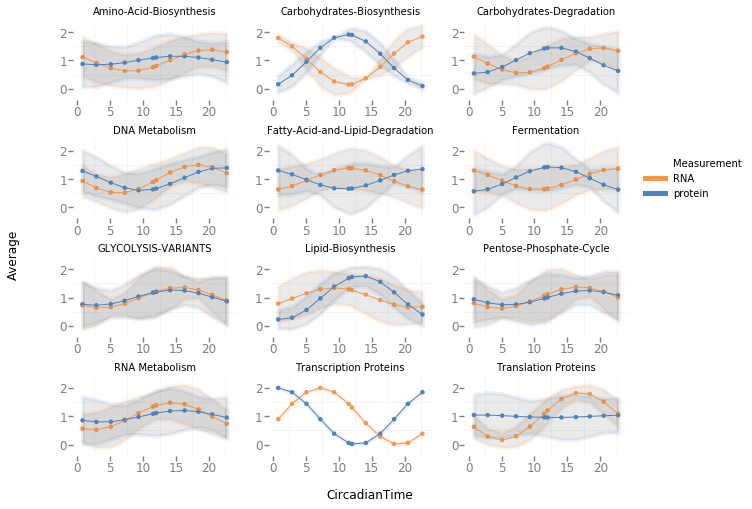

In [229]:
%matplotlib inline
from ggplot import *
import os
import pandas as pd
from IPython.display import display, HTML, Latex, Markdown
pwy_classes = ['Amino-Acid-Biosynthesis',
 'Carbohydrates-Biosynthesis',
 'Carbohydrates-Degradation',
 'Fatty-Acid-and-Lipid-Degradation',
 'Fermentation',
 'GLYCOLYSIS-VARIANTS',
 'Lipid-Biosynthesis',
 'Pentose-Phosphate-Cycle',
  'DNA Metabolism',
 'RNA Metabolism',
 'Transcription Proteins',
 'Translation Proteins'
]
pwy_data = {}
melted_pwy_data = {}
stat_data = {}
protein_and_rna_circadian_oscillations = pd.read_table('ProteinAndRNACircadianOscillations24.tsv',index_col='$Gene')
for pwy in pwy_classes:
    pwy_genes = pd.read_table('genes-of-{}.tab'.format(pwy.replace(' ', '-')),index_col='Gene')
    pwy_data[pwy] =protein_and_rna_circadian_oscillations.loc[pwy_genes.index].dropna()
    pwy_data[pwy].loc['Average'] = pwy_data[pwy].mean(axis=0)
    pwy_data[pwy].index.name='Gene'
    melted_pwy_data[pwy] = pwy_data[pwy].reset_index().melt(id_vars='Gene')
    melted_pwy_data[pwy]['Average'] = melted_pwy_data[pwy]['Gene'] == 'Average' 
    #melted_pwy_data[pwy]['StdDev'] = melted_pwy_data[pwy]['Gene'] == 'StdDev'
    #display(melted_pwy_data[pwy])
    melted_pwy_data[pwy]['CircadianTime'] =  melted_pwy_data[pwy]['variable'].str.extract(r'CT([^_]+)_',expand=False).astype(float)
    melted_pwy_data[pwy]['Measurement'] = melted_pwy_data[pwy]['variable'].str.split('_').str.get(1)
    melted_pwy_data[pwy]['PathwayClass'] = pwy
    melted_pwy_data[pwy].to_csv('{}-rna-and-protein-oscillations.tab'.format(pwy.replace(' ', '-')),sep='\t',index=False)
    pwy_data[pwy].loc['StdDev'] = pwy_data[pwy].std(axis=0)
    pwy_data[pwy].loc['ErrorBarBottom'] = pwy_data[pwy].loc['Average'] - pwy_data[pwy].loc['StdDev']
    pwy_data[pwy].loc['ErrorBarTop'] = pwy_data[pwy].loc['Average'] + pwy_data[pwy].loc['StdDev']
    stat_data[pwy] = pwy_data[pwy].loc[['Average','StdDev','ErrorBarBottom','ErrorBarTop']]
    stat_data[pwy]['PathwayClass'] = pwy
    stat_data[pwy] = stat_data[pwy].reset_index()
#stat_pwy_data = pd.concat(pwy_data.values(),ignore_index=True)
#display(stat_pwy_data)    
all_pwy_data = pd.concat(melted_pwy_data.values(),ignore_index=True)
all_pwy_data.to_csv('pwy-rna-and-protein-oscillations.tab',sep='\t',index=False)
#display(all_pwy_data)
#avg_pwy_data = 


melted_stat_data = pd.concat(stat_data.values(),ignore_index=True).melt(id_vars=['PathwayClass','Gene'])
melted_stat_data['CircadianTime'] =  melted_stat_data['variable'].str.extract(r'CT([^_]+)_',expand=False).astype(float)
melted_stat_data['Measurement'] = melted_stat_data['variable'].str.split('_').str.get(1)
melted_stat_data = melted_stat_data.set_index(['PathwayClass','Measurement','CircadianTime','variable','Gene']).unstack().reset_index()
#ggplot(aes(x='Hours since DD', y='value', color='Measurement'),data=all_pwy_data) + geom_point()  +  facet_wrap('PathwayClass') + scale_color_manual(values=['#F79646','#4F81BD']) + theme_bw()
for idx in ['Average', u'ErrorBarBottom', u'ErrorBarTop',
       u'StdDev']:
        melted_stat_data[idx] = melted_stat_data['value',idx]
del melted_stat_data['value']
display(melted_stat_data)
p = ggplot( aes(x='CircadianTime', y='Average', color='Measurement'),
           data=melted_stat_data) +\
    geom_ribbon(aes(x='CircadianTime',ymin='ErrorBarBottom',ymax='ErrorBarTop', size=4, alpha=0.1)) + \
    geom_point(alpha=1, size=20) + \
    geom_line(alpha=1,size=1) +\
    facet_wrap('PathwayClass') + \
    scale_color_manual(values=['#F79646','#4F81BD']) + \
    theme_bw()
p
p.save('MeanAndStdRNAandProteinCircadianOscillations.pdf')
#geom_point(aes(x='Hours since DD', y='Average', color='Measurement')) + \

#### GGplot using geom_ribbon

In [231]:
PDF('https://cyc.agilebiofoundry.org/PeakPhases/MeanAndStdRNAandProteinCircadianOscillations.pdf')

## SmartTables
  * Hours the Protein peak lags behind the RNA peak.
  * Clock-controlled mRNA and Protein Peak Phases for Neurospora
  * 24-hour simulated expression based on peak phase:
      * all clock-controlled mRNA's in *N. crassa*
      * all clock-controlled proteins in *N. crassa*
      * clock-controlled protein that are enzymes in a known *N. crassa* pathway
      * clock-controlled mRNA whose product is an enzyme in a known *N. crassa* pathway
      * `RNAandProteinOscillations12` contains 12 data points per clock-controlled gene, where simulated mRNA and Protein expression is alternated every 2 hours: `0h_mRNA, 2h_protein, 4h_mRNA, 6h_protein,...,20h_mRNA, 22h_protein`
      * `RNAandProteinOscillations24` contains 24 data points per gene, where simulated mRNA and Protein expression is interleaved:  `0h_mRNA, 0h_protein, 2h_mRNA, 2h_protein,..., 22h_mRNA, 22h_protein`
  * Citation:

```
[PTools13] Mike Travers., S.M Paley., J.Shrager., T.A Holland., and Peter Karp
Groups:knowledge spreadsheets for symbolic biocomputing
Database, doi:10.1093/database/bat061 (2013)```


 